# Power Data Visualisation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

The TV which we have taken the measurements on is a Samsung q88

The tabel below shows what data we have collected:

| TV Show             | Season | Episode | Image | Application | Acronym |
|---------------------|--------|---------|-------|-------------|---------|
| The Mandalorian     | 2      | 01      | 4k    | Disney Plus | M     |
| The Mandalorian     | 2      | 01      | HD    | Disney Plus | M     |
| Shaun the Sheep     | 5      | 01      |       | BBC         | STS    |
| Shaun the Sheep     | 5      | 01      |       | Netflix     | STS    |
| Spidey and His Amazing Friends | 1 | 06 |    | Disney Plus | SAF   |
| Spidey and His Amazing Friends | 1 | 06 |    | BBC | SAF   |
| Wild Islands        |        | 03      | UHD   | BBC         | WI     |

Note: We have also collected samsungs idel TV Power 

In [2]:
#HDR and SDR Comparison data
HDR_mand = "./power_data/samsung_q88/samsung_disneyp_mandalorian_s2_e01_4k.csv"
SDR_mand = "./power_data/samsung_q88/samsung_disneyp_mandalorian_s2_e01_hd.csv"

#Application Comparison data
bbc_STS = "./power_data/samsung_q88/samsung_bbc_shaun_s05_e01.csv"
netflix_STS = "./power_data/samsung_q88/samsung_netflix_shaun_s05_e01.csv"

bbc_SAF = "./power_data/samsung_q88/samsung_bbc_spidey_not_so_fun_house_s01_e06.csv"
disney_SAF = "./power_data/samsung_q88/samsung_disney_spidey_not_so_fun_house_s01_e06.csv"
#Ultra HD Data
UHD_WI = "./power_data/samsung_q88/samsung_bbc_wildisles_e03_uhd.csv"

#Samsung Idle data
idle_power = "./power_data/samsung_q88/samsung_idle.csv"

#Read the files
HDR_mand_df = pd.read_csv(HDR_mand,names=['datetime', 'power'])
SDR_mand_df = pd.read_csv(SDR_mand,names=['datetime', 'power'])
bbc_STS_df = pd.read_csv(bbc_STS,names=['datetime', 'power'])
netflix_STS_df = pd.read_csv(netflix_STS,names=['datetime', 'power'])
bbc_SAF_df = pd.read_csv(bbc_SAF,names=['datetime', 'power'])
disney_SAF_df = pd.read_csv(disney_SAF,names=['datetime', 'power'])
UHD_WI_df = pd.read_csv(UHD_WI,names=['datetime', 'power'])
idle_power_df = pd.read_csv(idle_power,names=['datetime', 'power'])
                     
HDR_mand_df

,datetime,power
0,2023-04-03 19:18:44,67.345
1,2023-04-03 19:18:45,67.551
2,2023-04-03 19:18:46,67.016
3,2023-04-03 19:18:47,67.283
4,2023-04-03 19:18:48,67.510
...,...,...
1025,2023-04-03 19:35:48,15.533
1026,2023-04-03 19:35:49,15.205
1027,2023-04-03 19:35:50,15.494
1028,2023-04-03 19:35:51,15.315


## Format

In [3]:
def format(df):
    df["datetime"] = pd.to_datetime(df["datetime"])
    df["datetime"] = df["datetime"] - df["datetime"].min()
    df = df.set_index("datetime")
    return df

HDR_mand_df = format(HDR_mand_df)
SDR_mand_df = format(SDR_mand_df)
bbc_STS_df = format(bbc_STS_df)
netflix_STS_df = format(netflix_STS_df)
bbc_SAF_df = format(bbc_SAF_df)
disney_SAF_df = format(disney_SAF_df)
UHD_WI_df = format(UHD_WI_df)
idle_power_df = format(idle_power_df)

HDR_mand_df

,power
datetime,
0 days 00:00:00,67.345
0 days 00:00:01,67.551
0 days 00:00:02,67.016
0 days 00:00:03,67.283
0 days 00:00:04,67.510
...,...
0 days 00:17:04,15.533
0 days 00:17:05,15.205
0 days 00:17:06,15.494


## Combine

In [4]:
df_list = [HDR_mand_df,SDR_mand_df,bbc_STS_df,netflix_STS_df,bbc_SAF_df,disney_SAF_df,UHD_WI_df,idle_power_df]

def combined_dfs(df_list,):
    combined_df = df_list[0].merge(df_list[1],how='outer', left_index=True, right_index=True)
    for df in df_list[2:]:
        combined_df = combined_df.merge(df, how="outer", left_index=True, right_index=True)
    return combined_df

combined_df = combined_dfs(df_list)
column_names = ['HDR_mand', 'SDR_mand', 'bbc_STS', 'netflix_STS', 'bbc_SAF', 'disney_SAF', 'UHD_WI', 'idle_power']
combined_df.columns = column_names

combined_df

G:\Anaconda\envs\pythonProject1\lib\site-packages\pandas\core\frame.py:9190: FutureWarning: Passing 'suffixes' which cause duplicate columns {'power_x'} in the result is deprecated and will raise a MergeError in a future version.
  return merge(


,HDR_mand,SDR_mand,bbc_STS,netflix_STS,bbc_SAF,disney_SAF,UHD_WI,idle_power
datetime,,,,,,,,
0 days 00:00:00,67.345,95.590,87.190,79.857,88.190,63.665,68.609,0.000
0 days 00:00:01,67.551,96.916,87.453,80.081,88.386,63.791,68.529,0.000
0 days 00:00:02,67.016,88.458,87.149,80.414,88.354,63.974,68.893,0.000
0 days 00:00:03,67.283,37.533,85.166,80.184,88.896,63.913,68.994,0.000
0 days 00:00:04,67.510,83.160,80.003,80.324,87.195,63.208,68.969,0.000
...,...,...,...,...,...,...,...,...
0 days 00:18:29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.320
0 days 00:18:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.039
0 days 00:18:31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.448


## Plot

In [5]:
df_to_plot = combined_df[["HDR_mand","SDR_mand","idle_power"]]
df_to_plot = df_to_plot.dropna()

def plot_df(df,x_label,y_label, title):
    fig, ax = plt.subplots(figsize=(20, 10))
    #ax.set_xlabel("Time")
    ax.set_ylabel(y_label)
    ax.set_title(title)
    df.plot(ax=ax, xlabel=x_label)
    plt.show()
    plt.clf()

### Power difference between SDR and HDR

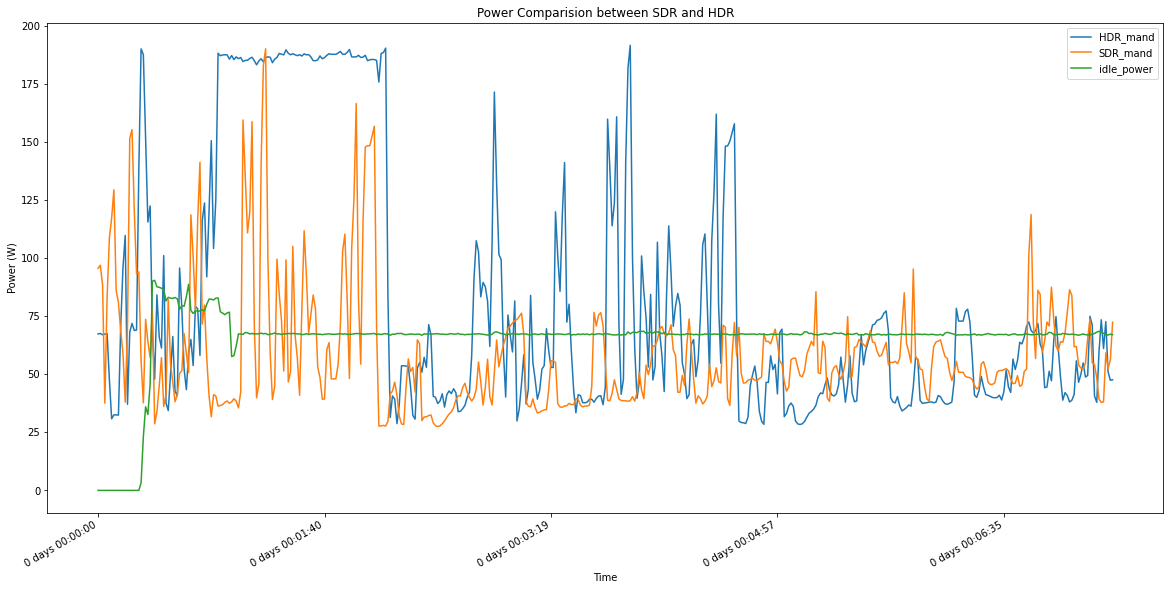

<Figure size 432x288 with 0 Axes>

In [6]:
df_to_plot_sdr_hdr = combined_df[["HDR_mand","SDR_mand","idle_power"]]
df_to_plot_sdr_hdr = df_to_plot_sdr_hdr.dropna()
plot_df(df_to_plot_sdr_hdr,"Time","Power (W)","Power Comparision between SDR and HDR")

### Power difference between BBC and Netflix watching Shaun the Sheep

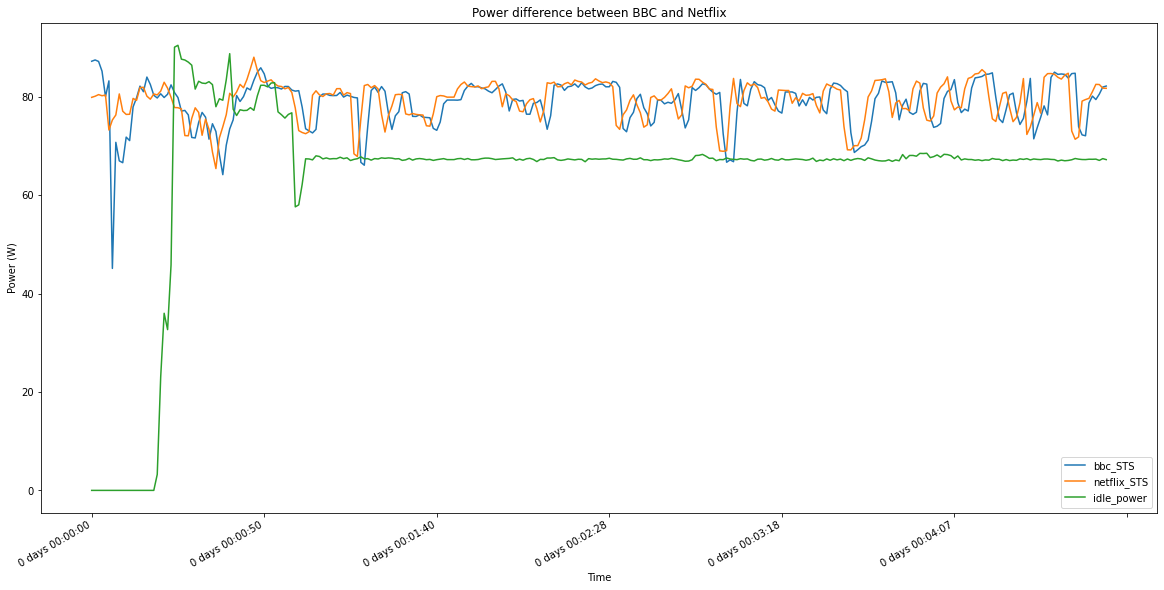

<Figure size 432x288 with 0 Axes>

In [7]:
df_to_plot_bbc_netflix = combined_df[["bbc_STS","netflix_STS","idle_power"]]
df_to_plot_bbc_netflix = df_to_plot_bbc_netflix.dropna()
plot_df(df_to_plot_bbc_netflix,"Time","Power (W)","Power difference between BBC and Netflix")

### Power difference between BBC and Disney + watching Spidey and his Amazing Friends

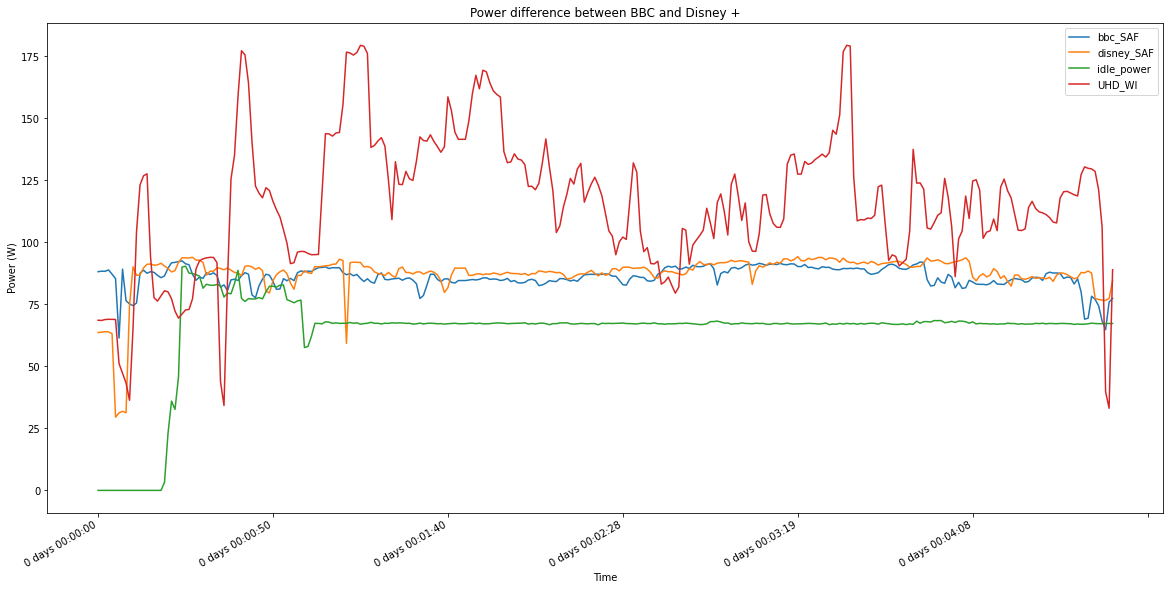

<Figure size 432x288 with 0 Axes>

In [8]:
df_to_plot_bbc_Disney = combined_df[["bbc_SAF","disney_SAF","idle_power","UHD_WI"]]
df_to_plot_bbc_Disney = df_to_plot_bbc_Disney.dropna()
plot_df(df_to_plot_bbc_Disney,"Time","Power (W)","Power difference between BBC and Disney +")

### Power difference between SDR, HDR, Ultra HD and Idle

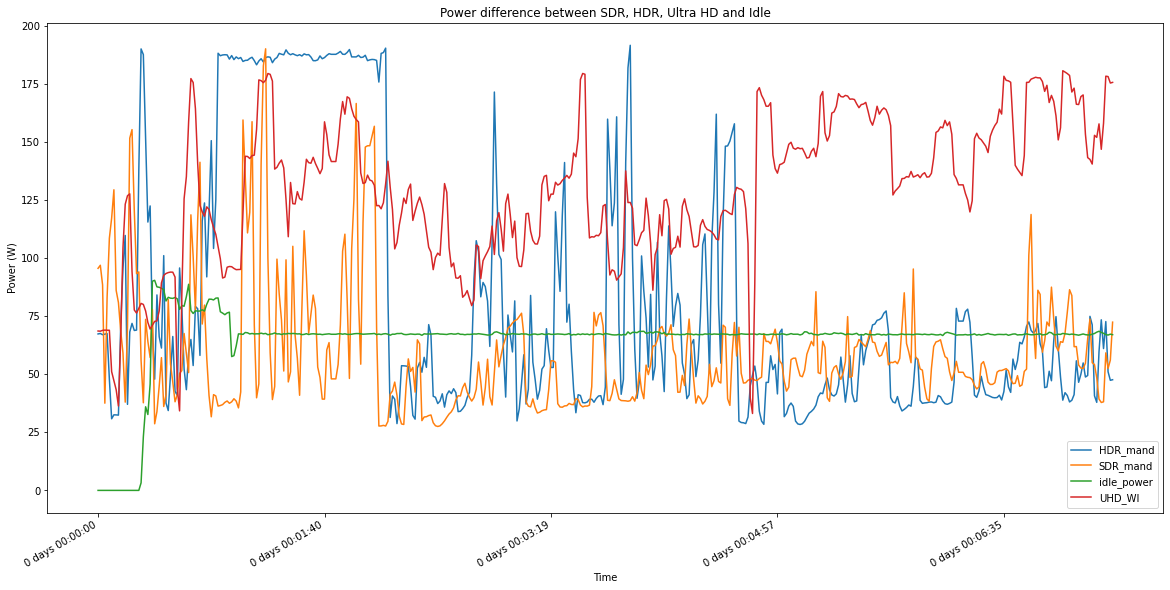

<Figure size 432x288 with 0 Axes>

In [9]:
df_to_plot_UHD = combined_df[["HDR_mand","SDR_mand","idle_power","UHD_WI"]]
df_to_plot_UHD = df_to_plot_UHD.dropna()
plot_df(df_to_plot_UHD,"Time","Power (W)","Power difference between SDR, HDR, Ultra HD and Idle")

In [10]:
combined_df = combined_df.dropna()
combined_df.mean(axis=0)

HDR_mand       101.394848
SDR_mand        59.987921
bbc_STS         78.706500
netflix_STS     79.269948
bbc_SAF         86.054100
disney_SAF      87.521931
UHD_WI         116.020490
idle_power      63.852952
dtype: float64